In [1]:
# Import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
import requests
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62368eea2f73da9644160efa33533653


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | miri
Processing Record 4 of Set 1 | luau
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | sioux lookout
Processing Record 7 of Set 1 | kikwit
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | pincher creek
Processing Record 13 of Set 1 | san jose de guanipa
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ashland
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | tura
Processing Record 22 of Set 1 | haimen
Pr

City not found. Skipping...
Processing Record 37 of Set 3 | kavieng
Processing Record 38 of Set 3 | nuzvid
Processing Record 39 of Set 3 | puerto ayacucho
Processing Record 40 of Set 3 | lebu
Processing Record 41 of Set 3 | morant bay
Processing Record 42 of Set 3 | mount isa
Processing Record 43 of Set 3 | maarianhamina
Processing Record 44 of Set 3 | sept-iles
Processing Record 45 of Set 3 | kailua
Processing Record 46 of Set 3 | vicosa do ceara
Processing Record 47 of Set 3 | butaritari
Processing Record 48 of Set 3 | muktsar
Processing Record 49 of Set 3 | muros
Processing Record 50 of Set 3 | rock springs
Processing Record 1 of Set 4 | meyungs
City not found. Skipping...
Processing Record 2 of Set 4 | la rioja
Processing Record 3 of Set 4 | benguela
Processing Record 4 of Set 4 | nikolayevka
Processing Record 5 of Set 4 | coihaique
Processing Record 6 of Set 4 | bathsheba
Processing Record 7 of Set 4 | aklavik
Processing Record 8 of Set 4 | cidreira
Processing Record 9 of Set 4 | 

Processing Record 24 of Set 7 | ishigaki
Processing Record 25 of Set 7 | nelson bay
Processing Record 26 of Set 7 | nouadhibou
Processing Record 27 of Set 7 | port lincoln
Processing Record 28 of Set 7 | khandyga
Processing Record 29 of Set 7 | tateyama
Processing Record 30 of Set 7 | illimo
City not found. Skipping...
Processing Record 31 of Set 7 | luwuk
Processing Record 32 of Set 7 | auki
Processing Record 33 of Set 7 | egvekinot
Processing Record 34 of Set 7 | labuan
Processing Record 35 of Set 7 | ostrovnoy
Processing Record 36 of Set 7 | katobu
Processing Record 37 of Set 7 | istok
Processing Record 38 of Set 7 | trostberg
Processing Record 39 of Set 7 | malindi
Processing Record 40 of Set 7 | huambo
Processing Record 41 of Set 7 | saryshagan
City not found. Skipping...
Processing Record 42 of Set 7 | nantucket
Processing Record 43 of Set 7 | merauke
Processing Record 44 of Set 7 | boa vista
Processing Record 45 of Set 7 | bealanana
Processing Record 46 of Set 7 | kamaishi
Proce

Processing Record 14 of Set 11 | grand centre
City not found. Skipping...
Processing Record 15 of Set 11 | aransas pass
Processing Record 16 of Set 11 | buarcos
Processing Record 17 of Set 11 | ugoofaaru
Processing Record 18 of Set 11 | daru
Processing Record 19 of Set 11 | seoul
Processing Record 20 of Set 11 | sitio novo do tocantins
Processing Record 21 of Set 11 | molina
Processing Record 22 of Set 11 | saint-raymond
Processing Record 23 of Set 11 | guane
Processing Record 24 of Set 11 | phayao
Processing Record 25 of Set 11 | rypefjord
Processing Record 26 of Set 11 | gorontalo
Processing Record 27 of Set 11 | dargaville
Processing Record 28 of Set 11 | phan rang
City not found. Skipping...
Processing Record 29 of Set 11 | korla
Processing Record 30 of Set 11 | tarudant
City not found. Skipping...
Processing Record 31 of Set 11 | nynashamn
Processing Record 32 of Set 11 | shahrud
Processing Record 33 of Set 11 | karauzyak
City not found. Skipping...
Processing Record 34 of Set 11 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,48.99,83,100,15.99,NZ,2021-05-14 19:13:37
1,New Norfolk,-42.7826,147.0587,39.00,84,86,2.57,AU,2021-05-14 19:13:37
2,Miri,4.4148,114.0089,80.60,89,40,3.44,MY,2021-05-14 19:13:37
3,Luau,-10.7073,22.2247,65.30,59,0,2.30,AO,2021-05-14 19:13:38
4,Sioux Lookout,50.1001,-91.9170,66.20,37,90,12.66,CA,2021-05-14 19:13:38
5,Kikwit,-5.0410,18.8162,78.80,60,100,2.01,CD,2021-05-14 19:13:39
6,Vila Franca Do Campo,37.7167,-25.4333,66.20,88,40,11.50,PT,2021-05-14 19:13:39
7,Ushuaia,-54.8000,-68.3000,50.00,66,0,3.44,AR,2021-05-14 19:11:30
8,Qaanaaq,77.4840,-69.3632,33.96,79,96,9.55,GL,2021-05-14 19:13:40
9,Bredasdorp,-34.5322,20.0403,60.80,72,1,4.61,ZA,2021-05-14 19:13:40


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-05-14 19:13:37,-46.6000,168.3333,48.99,83,100,15.99
1,New Norfolk,AU,2021-05-14 19:13:37,-42.7826,147.0587,39.00,84,86,2.57
2,Miri,MY,2021-05-14 19:13:37,4.4148,114.0089,80.60,89,40,3.44
3,Luau,AO,2021-05-14 19:13:38,-10.7073,22.2247,65.30,59,0,2.30
4,Sioux Lookout,CA,2021-05-14 19:13:38,50.1001,-91.9170,66.20,37,90,12.66
...,...,...,...,...,...,...,...,...,...
557,Leshukonskoye,RU,2021-05-14 19:17:15,64.8989,45.7622,57.97,85,96,1.07
558,Uyar,RU,2021-05-14 19:17:15,55.8100,94.3153,38.66,81,5,10.45
559,Tweed,CA,2021-05-14 19:17:15,44.4751,-77.3162,71.01,30,14,7.00
560,Half Moon Bay,US,2021-05-14 19:13:44,37.4636,-122.4286,66.99,93,90,9.22


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1621019836.5413034

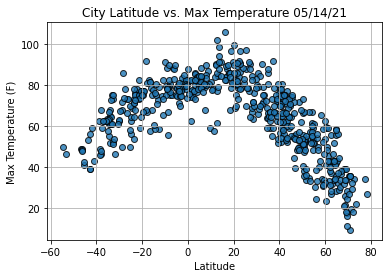

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

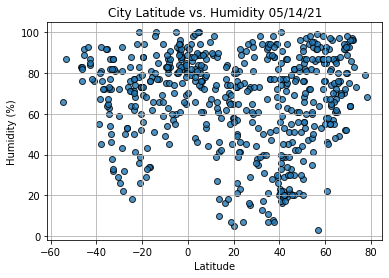

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

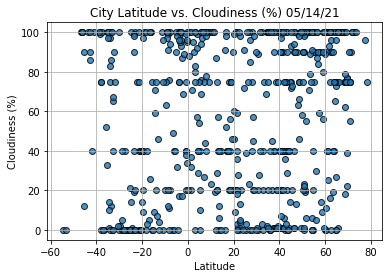

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

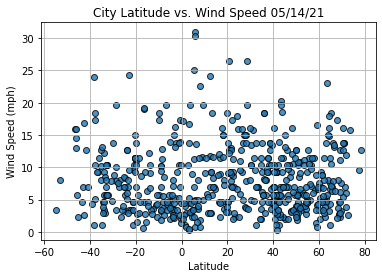

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [54]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [55]:
index13 = city_data_df.loc[13]

In [56]:
index13

City                      Ashland
Country                        US
Date          2021-05-14 19:13:42
Lat                       40.8167
Lng                      -82.2665
Max Temp                    64.99
Humidity                       33
Cloudiness                     99
Wind Speed                   1.99
Name: 13, dtype: object

In [57]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
557     True
558     True
559     True
560     True
561    False
Name: Lat, Length: 562, dtype: bool

In [58]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Miri,MY,2021-05-14 19:13:37,4.4148,114.0089,80.60,89,40,3.44
4,Sioux Lookout,CA,2021-05-14 19:13:38,50.1001,-91.9170,66.20,37,90,12.66
6,Vila Franca Do Campo,PT,2021-05-14 19:13:39,37.7167,-25.4333,66.20,88,40,11.50
8,Qaanaaq,GL,2021-05-14 19:13:40,77.4840,-69.3632,33.96,79,96,9.55
10,Pincher Creek,CA,2021-05-14 19:13:40,49.4833,-113.9520,62.01,51,1,5.75


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

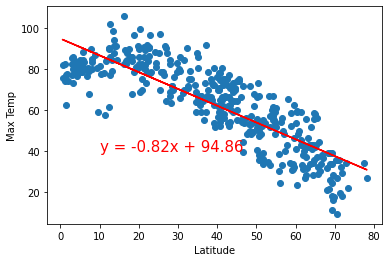

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

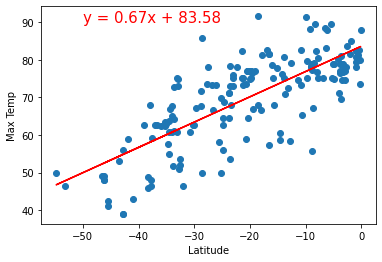

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

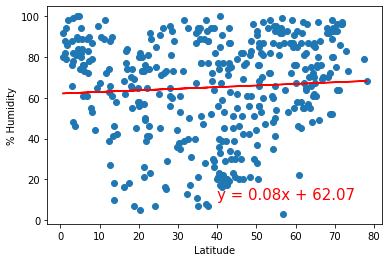

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

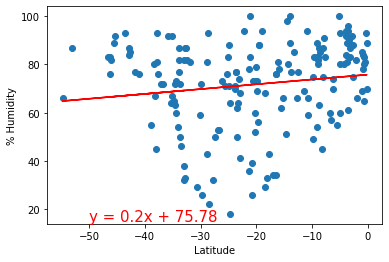

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [65]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Miri,MY,2021-05-14 19:13:37,4.4148,114.0089,80.60,89,40,3.44
4,Sioux Lookout,CA,2021-05-14 19:13:38,50.1001,-91.9170,66.20,37,90,12.66
6,Vila Franca Do Campo,PT,2021-05-14 19:13:39,37.7167,-25.4333,66.20,88,40,11.50
8,Qaanaaq,GL,2021-05-14 19:13:40,77.4840,-69.3632,33.96,79,96,9.55
10,Pincher Creek,CA,2021-05-14 19:13:40,49.4833,-113.9520,62.01,51,1,5.75


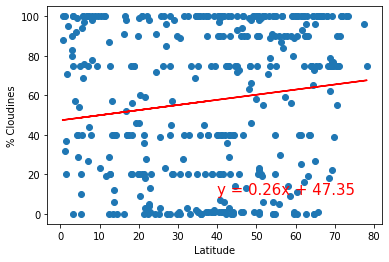

In [67]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere / for % Cloudiness', '% Cloudines',(40,10))

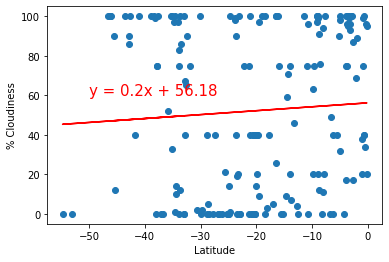

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

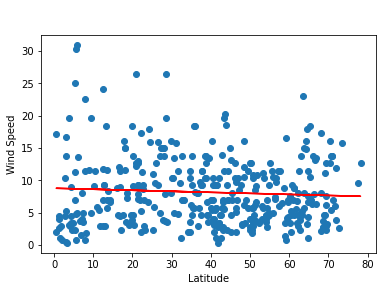

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

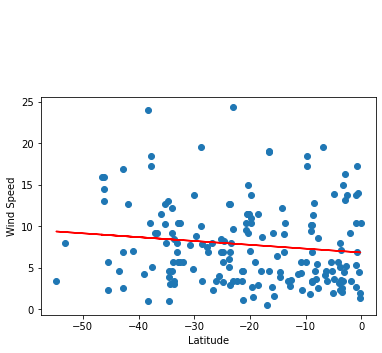

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [79]:
pip install gmaps
